<a href="https://colab.research.google.com/github/tarun-bandi/ml_notes/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [12]:

# Load the Iris dataset
iris = load_iris()

# Features and target
X = iris.data  # Features
y = iris.target  # Target labels

# # Description
print(iris.DESCR)  # Optional: Prints a detailed description of the dataset

# Feature names
print("Feature Names:", iris.feature_names)

# Target names
print("Target Names:", iris.target_names)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
y_pred = svm.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



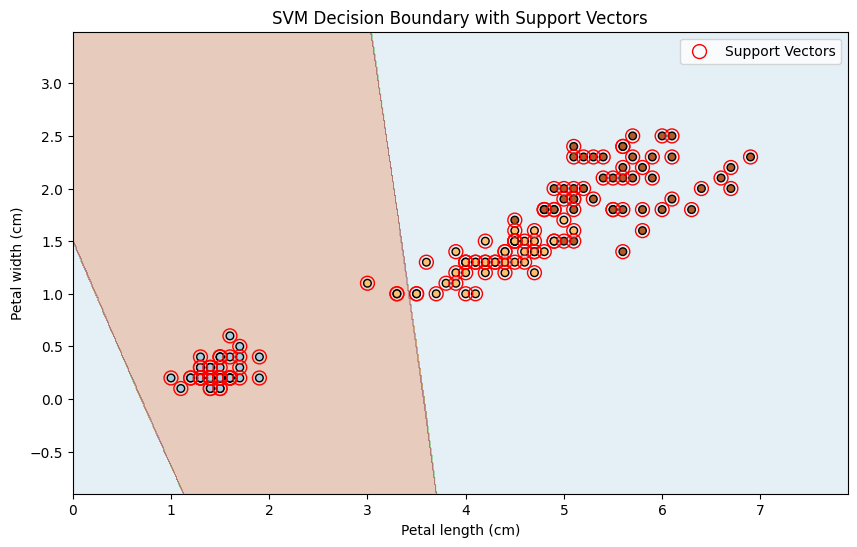

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Load dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Use petal length and petal width for visualization
y = iris.target

# Train SVM
svm = SVC(kernel='sigmoid', gamma='scale', coef0=0)
svm.fit(X, y)

# Create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict over the grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='red', label='Support Vectors')
plt.title("SVM Decision Boundary with Support Vectors")
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.show()
